In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from scipy import stats

# importing the churn_raw_data.csv through the file path
df = pd.read_csv('/Users/justinhuynh/Desktop/churn_clean.csv')
# check all information about this file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [10]:
# create a contingency table for marital status to contract length
table = pd.crosstab(df['Marital'], df['Contract'])
print(table)

Contract       Month-to-month  One year  Two Year
Marital                                          
Divorced                 1166       425       501
Married                  1067       399       445
Never Married            1046       416       494
Separated                1085       422       507
Widowed                  1092       440       495


In [11]:
# perform chi-square test
chi = stats.chi2_contingency(table)
print(chi)
# what is the p-value?
print(f"The p-value is {chi[1]:.3}.")

Chi2ContingencyResult(statistic=5.123017148617485, pvalue=0.7443506356112823, dof=8, expected_freq=array([[1141.3952,  439.7384,  510.8664],
       [1042.6416,  401.6922,  466.6662],
       [1067.1936,  411.1512,  477.6552],
       [1098.8384,  423.3428,  491.8188],
       [1105.9312,  426.0754,  494.9934]]))
The p-value is 0.744.


Text(0.5, 1.0, 'Distribution of Monthly Charges')

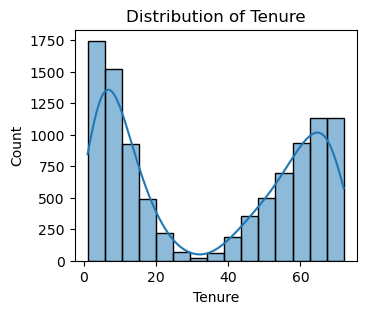

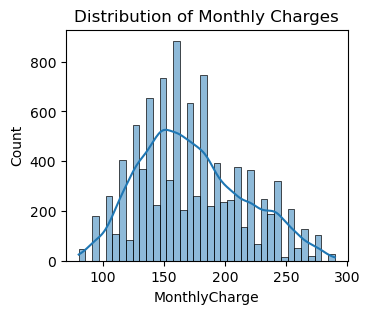

In [49]:
# histogram for tenure variable (continuous variable)
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
sns.histplot(df['Tenure'], kde=True)
plt.title('Distribution of Tenure')

# histogram for monthlycharge variable (continuous variable)
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
sns.histplot(df['MonthlyCharge'], kde=True)
plt.title('Distribution of Monthly Charges')

Text(0.5, 1.0, 'Count of Internet Service')

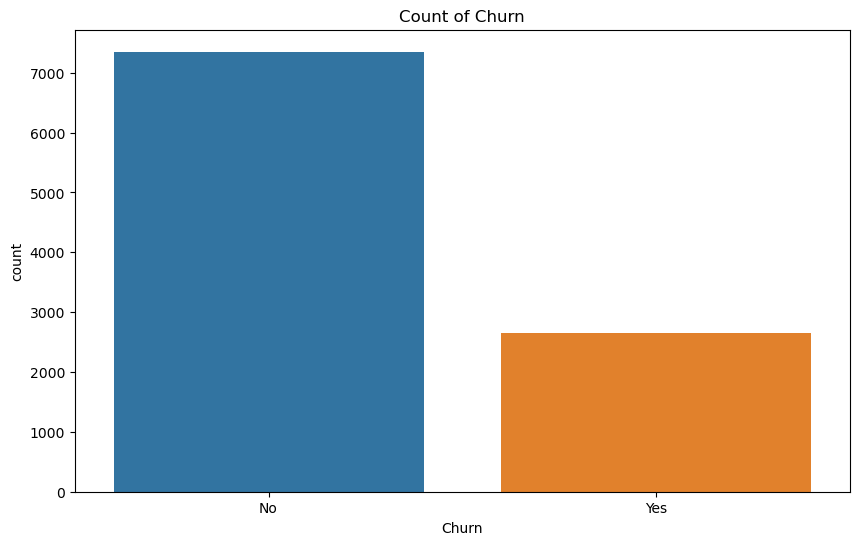

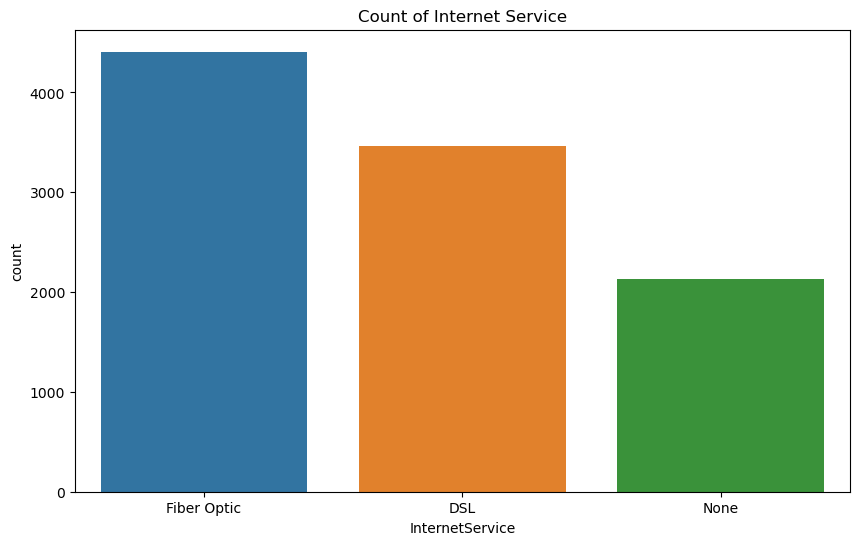

In [45]:
# bar plot for churn variable (categorical)
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Churn'])
plt.title('Count of Churn')

# bar plot for internetservice variable (categorical)
plt.figure(figsize=(10, 6))
sns.countplot(x=df['InternetService'])
plt.title('Count of Internet Service')

In [27]:
# continuous
tenure_stats = df['Tenure'].describe()
print(tenure_stats)

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64


In [28]:
# continuous
monthly_charges_stats = df['MonthlyCharge'].describe()
print(monthly_charges_stats)

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64


In [32]:
# categorical
churn_counts = df['Churn'].value_counts()
print(churn_counts)

No     7350
Yes    2650
Name: Churn, dtype: int64


In [33]:
# categorical
internet_service_counts = df['InternetService'].value_counts()
print(internet_service_counts)

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64


In [51]:
# bivariate stats for continuous variables
correlation = df[['Tenure', 'MonthlyCharge']].corr()
print(correlation)

                 Tenure  MonthlyCharge
Tenure         1.000000      -0.003337
MonthlyCharge -0.003337       1.000000


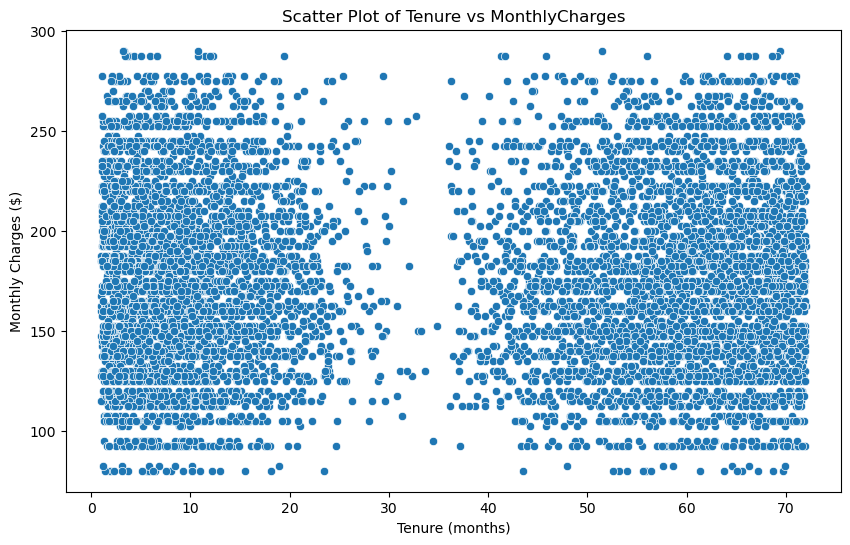

In [53]:
#scatter plot of tenure vs. monthly charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tenure', y='MonthlyCharge', data=df)
plt.title('Scatter Plot of Tenure vs MonthlyCharges')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.show()

In [54]:
# bivariate stats for categorical variables
contingency_table = pd.crosstab(df['Churn'], df['InternetService'])
print(contingency_table)

InternetService   DSL  Fiber Optic  None
Churn                                   
No               2349         3368  1633
Yes              1114         1040   496


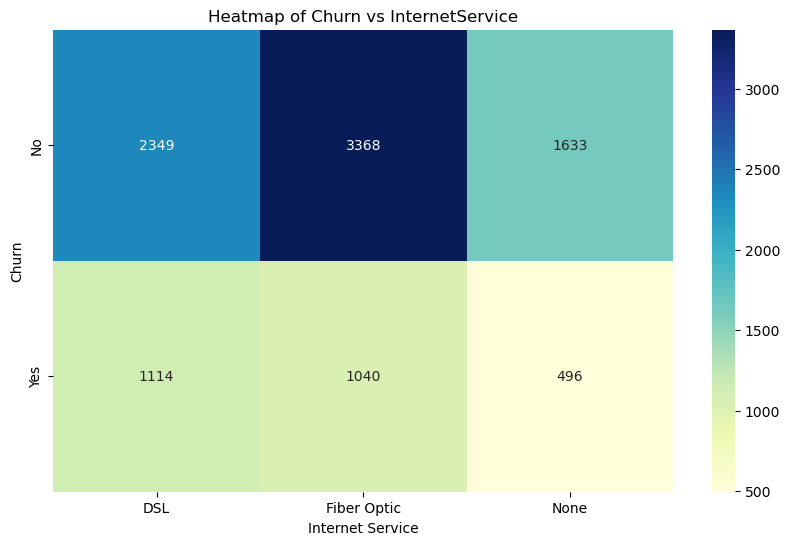

In [55]:
# heatmap of contingency table
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Churn vs InternetService')
plt.xlabel('Internet Service')
plt.ylabel('Churn')
plt.show()

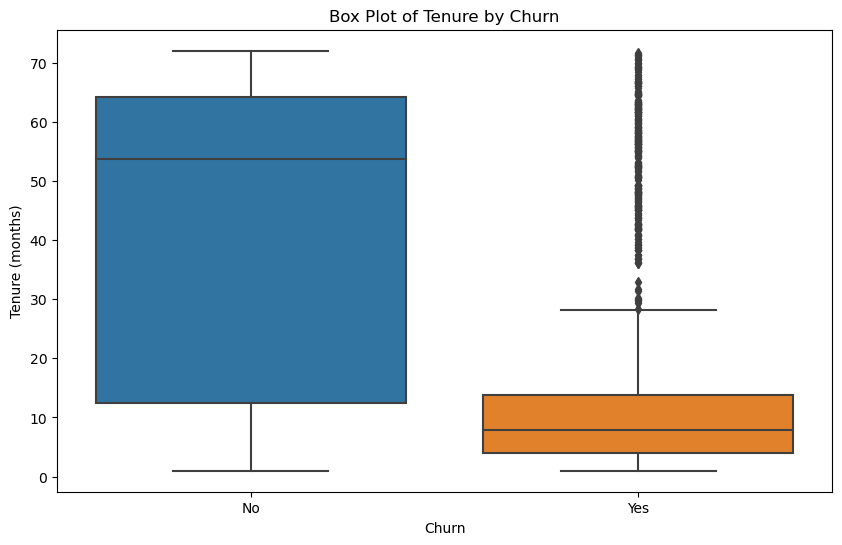

In [56]:
# relationship between continuous tenure vs categorical churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Tenure', data=df)
plt.title('Box Plot of Tenure by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.show()

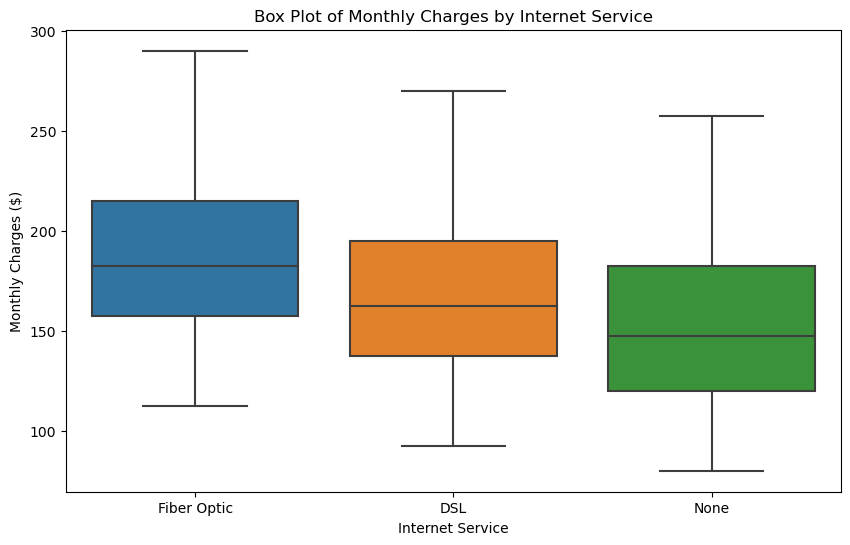

In [58]:
# relationship between continuous monthlycharges vs categorical internetservice
plt.figure(figsize=(10, 6))
sns.boxplot(x='InternetService', y='MonthlyCharge', data=df)
plt.title('Box Plot of Monthly Charges by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Monthly Charges ($)')
plt.show()